<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_%EA%B0%80%EA%B5%AC%EC%83%9D%EC%82%B0%EC%B5%9C%EC%A0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

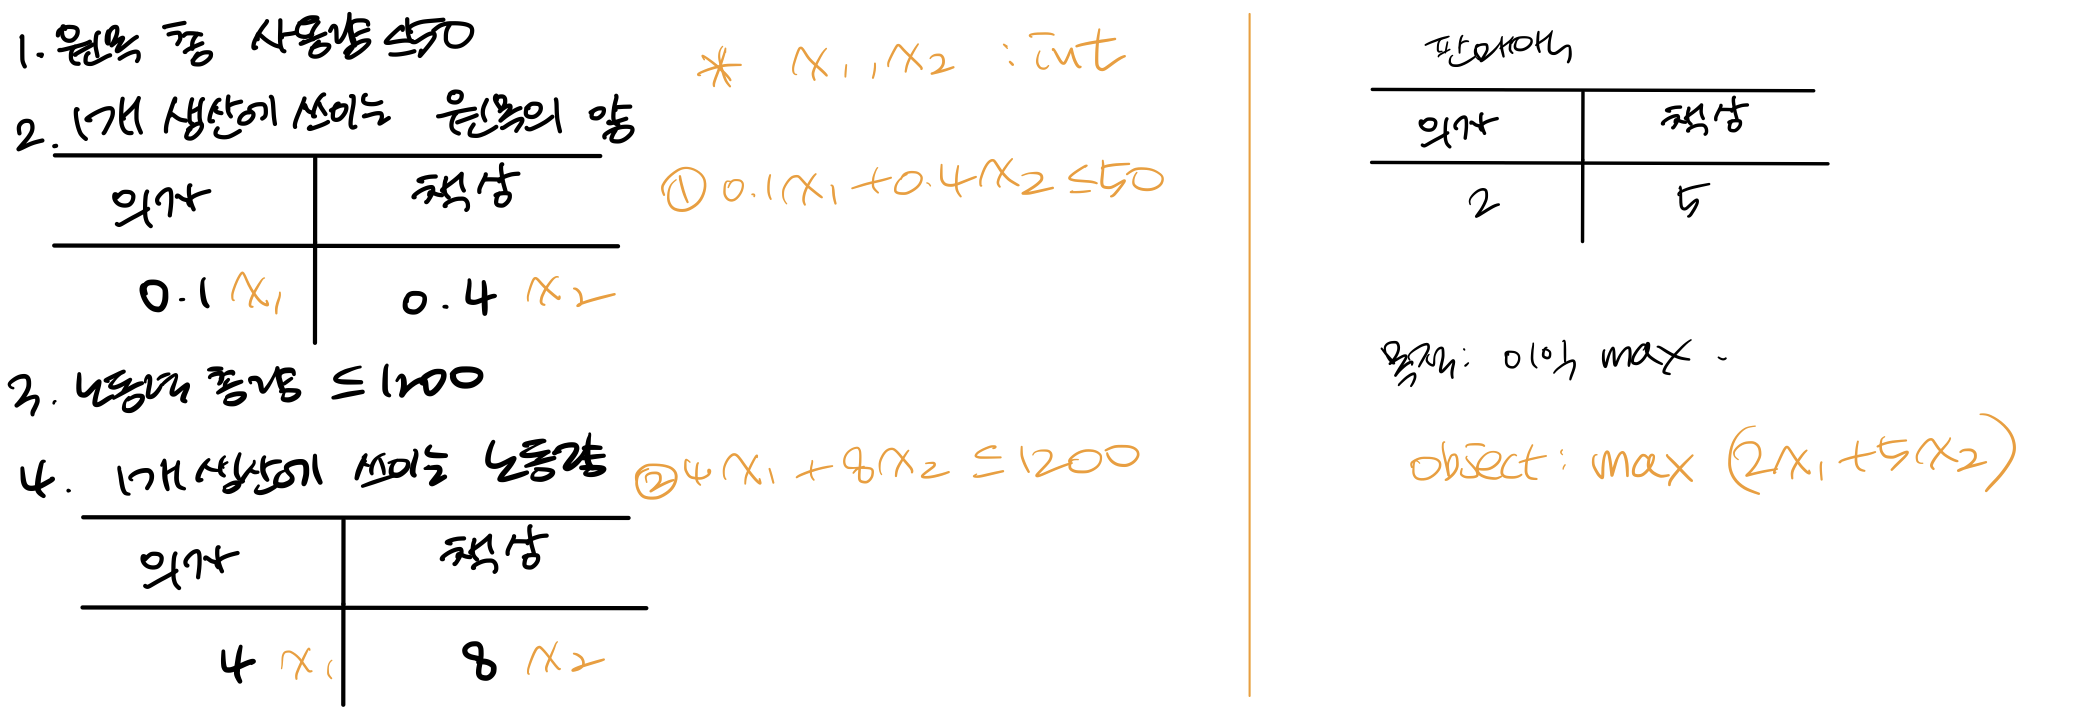

In [1]:
!pip install pulp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pulp import *

## Model define

In [9]:
model = LpProblem(name ='Furniture', sense = LpMaximize)

num_variables =2
variables =[LpVariable(name=f'x{i}', lowBound =0, cat = 'Integer') for i in range(1,num_variables+1)]

### Constraints

In [10]:
constraints = []
constr_coeff = [[0.1, 0.4], [4,8]]
constraints_num =2

for i in range(constraints_num):
  rhs_values =[50, 1200]
  constr_sup =LpConstraint(
      e = LpAffineExpression([(variables[j], constr_coeff[i][j]) for j in range(num_variables)]),
      sense = LpConstraintLE,
      rhs = rhs_values[i],
      name = f'cosntraint_sup{i+1}'
  )
  constraints.append(constr_sup)

In [11]:
print(constraints)

[0.1*x1 + 0.4*x2 + -50 <= 0, 4*x1 + 8*x2 + -1200 <= 0]


### Define object 
### add object to model

In [12]:
obj_coeff =[2,5]
obj = LpAffineExpression([(variables[i], obj_coeff[i]) for i in range(num_variables)])
model += obj

### Add variables, constraints

In [13]:
for constraint in constraints:
  model += constraint
  
print(model)
model.writeLP('out.txt')


Furniture:
MAXIMIZE
2*x1 + 5*x2 + 0
SUBJECT TO
cosntraint_sup1: 0.1 x1 + 0.4 x2 <= 50

cosntraint_sup2: 4 x1 + 8 x2 <= 1200

VARIABLES
0 <= x1 Integer
0 <= x2 Integer



[x1, x2]

In [14]:
model.solve()


for variable in variables:
  print(f'{variable.name} : {variable.value()}')

print(f'Optimal object object value: {model.objective.value()}')

x1 : 100.0
x2 : 100.0
Optimal object object value: 700.0
